## Import Necessary Libraries

In [4]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

# Create a Dataframe for reading and analysing the text files easily

In [6]:
df_train = pd.read_csv(io.BytesIO(uploaded_train['train.txt']), header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv(io.BytesIO(uploaded_test['test.txt']), header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv(io.BytesIO(uploaded_val['val.txt']), header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [7]:
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

## Reading the Train and Validation Data

In [8]:
X=df_train['Input']


In [9]:
lst=[]
for i in X:
  lst.append(len(i))


In [10]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


In [11]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

# Trying to fix a length for the embedding layers' input

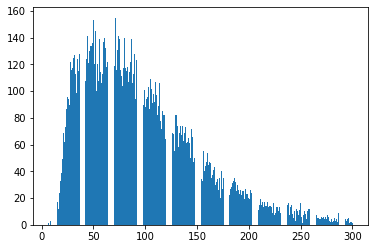

In [12]:
plt.bar(range(7,301),cts)
plt.show()

# Using The tokenizer Class to convert the sentences into word vectors

In [13]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [14]:
len(tokenizer.word_index)

15213

In [15]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [16]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [17]:
Y_train=df_train['Sentiment'].values


# One hot Encoding the Emotion Values

In [18]:
Y_train_f=to_categorical(Y_train)

In [19]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [20]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [21]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [22]:
Y_val_f=to_categorical(Y_val)

In [23]:
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout


# Creating a Model

In [25]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            973568    
                                                                 
 dropout (Dropout)           (None, 80, 64)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 80, 160)          92800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 320)              410880    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 1926      
                                                                 
Total params: 1,479,174
Trainable params: 1,479,174
Non-

# Compiling and running the model

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 236s 461ms/step - loss: 1.2111 - accuracy: 0.5167 - val_loss: 0.6195 - val_accuracy: 0.7625
Epoch 2/12
500/500 [==============================] - 223s 446ms/step - loss: 0.4894 - accuracy: 0.8252 - val_loss: 0.3186 - val_accuracy: 0.8865
Epoch 3/12
500/500 [==============================] - 229s 457ms/step - loss: 0.2766 - accuracy: 0.9059 - val_loss: 0.2255 - val_accuracy: 0.9190
Epoch 4/12
500/500 [==============================] - 231s 463ms/step - loss: 0.1945 - accuracy: 0.9299 - val_loss: 0.2066 - val_accuracy: 0.9230
Epoch 5/12
500/500 [==============================] - 230s 459ms/step - loss: 0.1561 - accuracy: 0.9409 - val_loss: 0.1866 - val_accuracy: 0.9240
Epoch 6/12
500/500 [==============================] - 229s 457ms/step - loss: 0.1224 - accuracy: 0.9541 - val_loss: 0.1790 - val_accuracy: 0.9240
Epoch 7/12
500/500 [==============================] - 232s 463ms/step - loss: 0.1003 - accuracy: 0.9607 - val_loss: 0.1940 -

# Plotting the Loss and Accuracy Curves

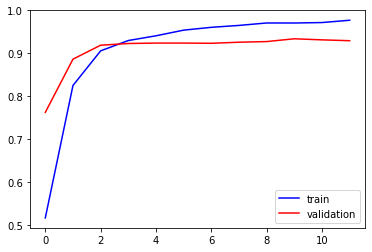

In [28]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

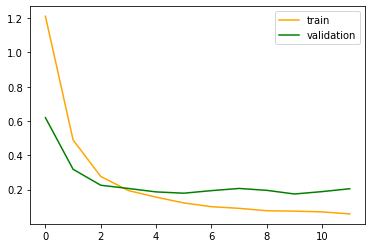

In [29]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# Checking for Test Data

In [30]:
X_test=df_test['Input']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [31]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [32]:
Y_test_f=to_categorical(Y_test)

In [33]:
X_test_pad.shape

(2000, 80)

In [34]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

#Accuracy for Test Data

In [35]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 9s 136ms/step - loss: 0.2039 - accuracy: 0.9240


[0.20391203463077545, 0.9240000247955322]

# Plotting the Confusion matrix 

In [49]:
#Y_pred=model.predict_classes(X_test_pad)
Y_pred=np.argmax(model.predict(X_test_pad), axis=-1)

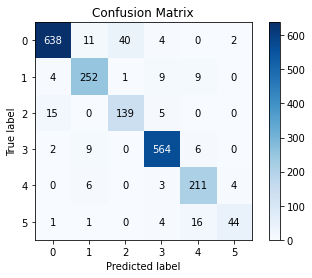

In [50]:
plot_confusion_matrix(Y_test,Y_pred)

In [51]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       695
           1       0.90      0.92      0.91       275
           2       0.77      0.87      0.82       159
           3       0.96      0.97      0.96       581
           4       0.87      0.94      0.91       224
           5       0.88      0.67      0.76        66

    accuracy                           0.92      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.93      0.92      0.92      2000



# Creating a Function to check for Your own Sentence

In [52]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key



In [55]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  #ans=get_key(model.predict_classes(sentence_padded))
  ans=get_key(np.argmax(model.predict(sentence_padded), axis=-1))
  print("The emotion predicted is",ans)

# Check for Your Own Sentence

In [56]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : I am happy today with sad mood
The emotion predicted is joy


In [57]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : fuck you piece of shit
The emotion predicted is anger


In [58]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : lol kid
The emotion predicted is sadness


In [63]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : That one specific BUET er bhaia demographic be like "major: engineering; passion: minors"
The emotion predicted is love
